   # Domain Oriented Case Study 
   
   ## Telecom Churn Prediction

                                                                                            - Somake Mehrotra
                                                                                            - Joshly Mary Johnson
                                                                                            - Sri Ranjani

## Problem Statement

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_columns', 500)


## Reading and understanding the Data

In [4]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
pd.set_option('display.max_rows', 200)

In [6]:
df.shape

(99999, 226)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [9]:
df = df.loc[:, df.isnull().mean() <= 0.3]
df.shape

(99999, 186)

In [10]:
df['circle_id']

0        109
1        109
2        109
3        109
4        109
        ... 
99994    109
99995    109
99996    109
99997    109
99998    109
Name: circle_id, Length: 99999, dtype: int64

In [11]:
# dropping circle_id since it has only one value
df = df.drop('circle_id', axis=1)
df.shape

(99999, 185)

In [12]:
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [13]:
df = df.drop(date_cols, axis=1)


In [14]:
df.shape

(99999, 177)

# Filtering and limiting the data to high value customers 

- To find the high value customers we would take those customers who have recharge value of => 70th p4ercentil of the average recharge of first two months i.e. 6th and 7th

In [15]:
# creating new coloumn to find the average value of the total recharge of first two months
df['average'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

# finding the 70th percentile
X = df['average'].quantile(0.7)
X

368.5

In [16]:
# Creating a dataset of customers with => 70th percentile of average

df = df[df['average'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.7

In [17]:
df.shape

(30011, 178)

# Data Cleaning - Handling missing values and outliers

In [18]:
# Now we will handle the rows with missing values of the above derived dataset
df_missing_rows = df[(df.isnull().sum(axis=1)) > (len(df.columns))//2]
df_missing_rows.shape

(114, 178)

In [19]:
# dropping the rows with more than 50% missing values
df = df.drop(df_missing_rows.index)
df.shape

(29897, 178)

In [20]:
missing = df.isnull().mean()*100
missing.sort_values(ascending=False)

loc_ic_mou_9          5.318259
og_others_9           5.318259
loc_og_t2t_mou_9      5.318259
loc_ic_t2t_mou_9      5.318259
loc_og_t2m_mou_9      5.318259
loc_og_t2f_mou_9      5.318259
loc_og_t2c_mou_9      5.318259
std_ic_t2m_mou_9      5.318259
loc_og_mou_9          5.318259
std_og_t2t_mou_9      5.318259
roam_og_mou_9         5.318259
std_ic_t2o_mou_9      5.318259
std_og_t2m_mou_9      5.318259
std_og_t2f_mou_9      5.318259
spl_og_mou_9          5.318259
std_og_t2c_mou_9      5.318259
std_og_mou_9          5.318259
isd_og_mou_9          5.318259
std_ic_t2t_mou_9      5.318259
std_ic_mou_9          5.318259
onnet_mou_9           5.318259
spl_ic_mou_9          5.318259
ic_others_9           5.318259
isd_ic_mou_9          5.318259
loc_ic_t2f_mou_9      5.318259
offnet_mou_9          5.318259
loc_ic_t2m_mou_9      5.318259
std_ic_t2f_mou_9      5.318259
roam_ic_mou_9         5.318259
loc_og_t2t_mou_8      2.756129
og_others_8           2.756129
roam_ic_mou_8         2.756129
std_og_t

- As we can see there are no more coloumns having significant missing values

- It seems that all coloumns with MOU for months  have missing values, therefore we can opt to drop these variables as they won't have any much relevance.

In [21]:
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

[]


In [22]:
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

In [23]:
df = df.drop(df_null_mou_9.index)

In [24]:
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

In [25]:
df = df.drop(df_null_mou_8.index)

In [26]:
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

In [27]:
df = df.drop(df_null_mou_6.index)

In [28]:
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

In [29]:
df = df.drop(df_null_mou_7.index)

In [30]:
df_missing = df.isnull().mean()*100
df_missing.sort_values(ascending=False)

mobile_number         0.0
total_rech_num_7      0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
std_ic_mou_6          0.0
std_ic_t2o_mou_9      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2t_mou_9      0.0
loc_ic_t2f_mou_9      0.0
loc_ic_mou_6          0.0
loc_ic_mou_7          0.0
loc_ic_mou_8          0.0
loc_ic_mou_9          0.0
std_ic_t2t_mou_6      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_m

- ***we can clearly see that there are no more null values so we can proceed with our analysis***

In [31]:
df.shape

(27991, 178)

# Tagging the Churners basis 4th month

**we will define customers as churned = 1 or not churned = 0 on the basis of Usage in the 4th month. If they had not made any call or not used internet at all then the customer will be tagged as churned**

In [32]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [33]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49

**We will delete all the variables pertaining to the churn phase i.e. 9th month**

In [34]:
var_9 = [col for col in df.columns.to_list() if '_9' in col]
print(var_9)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [35]:
df = df.drop(var_9, axis=1)

In [36]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)


In [37]:
# Checking the churn percentage
round(100*(df['churn'].mean()),2)

3.39

- Dataset seems to be imbalance as the percenatge of customers who have churned is very low only 3.3% so we will handle the imbalance in dataset later.

# Outliers Treatment

In [38]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

In [39]:
# Converting the coloumns mobile_number and churn to object type
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)


In [40]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

In [41]:
# lising all the numeric variables
num_col = df.select_dtypes(exclude=['object']).columns
print(num_col)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'average'],
      dtype='object', length=134)


In [42]:
# Removing outliers below 10th and above 90th percentile
for col in num_col: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

In [43]:
data.shape

(27705, 136)

## Deriving new columns for difference in good phase and action phase

In [44]:
# Avg. mou at good phase
# We are taking average because there are two months(6 and 7) in good phase
data['mou_good'] = (data['total_og_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_6'] + data['total_ic_mou_7'])/2
# Total mou at good phase incoming and outgoing
data['mou_action'] = (data['total_og_mou_8'] + data['total_ic_mou_8'])

In [45]:

# Difference mou_good and mou_action
data['diff_mou'] = data['mou_action'] - data['mou_good']

In [46]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)
data['decrease_mou_action'].value_counts()

1    15410
0    12295
Name: decrease_mou_action, dtype: int64

Following the same procedure for average revenue per customer

In [47]:
data['arpu_good'] = (data['arpu_6']+data['arpu_7'])/2
data['diff_arpu'] = data['arpu_8'] - data['arpu_good']
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)
data['decrease_arpu_action'].value_counts()

1    15880
0    11825
Name: decrease_arpu_action, dtype: int64

Following same procedure for volume based cost of the customer

In [48]:
data['vbc_3g_good'] = (data['jun_vbc_3g']+data['jul_vbc_3g'])/2
data['diff_vbc_3g'] = data['aug_vbc_3g'] - data['vbc_3g_good']
data['decrease_vbc_3g_action'] = np.where(data['diff_vbc_3g'] < 0, 1, 0)
data['decrease_vbc_3g_action'].value_counts()

0    23236
1     4469
Name: decrease_vbc_3g_action, dtype: int64

Following same procedure for number of recharge for the customer

In [49]:
data['rech_num_good'] = (data['total_rech_num_6']+data['total_rech_num_7'])/2
data['diff_rech_num'] = data['total_rech_num_8'] - data['rech_num_good']
data['decrease_rech_num_action'] = np.where(data['diff_rech_num'] < 0, 1, 0)
data['decrease_rech_num_action'].value_counts()

1    17411
0    10294
Name: decrease_rech_num_action, dtype: int64

Following same procedure for recharge amount of customer

In [50]:
data['rech_amt_good'] = (data['total_rech_amt_6']+data['total_rech_amt_7'])/2
data['diff_rech_amt'] = data['total_rech_amt_8'] - data['rech_amt_good']
data['decrease_rech_amt_action'] = np.where(data['diff_rech_amt'] < 0, 1, 0)
data['decrease_rech_amt_action'].value_counts()

1    16347
0    11358
Name: decrease_rech_amt_action, dtype: int64

Now that we have all the data ready, we can do some EDA to get more insights on the prepared dataset.

# EDA

### Univariate Analysis

In [51]:
# Checking churn rate based on the descrease in mou in action month
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

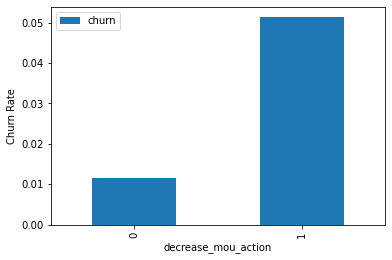

In [52]:
data.pivot_table(values = 'churn', index = 'decrease_mou_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

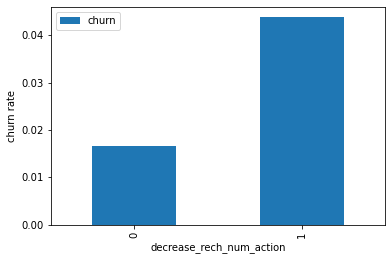

In [53]:
# Churn rate on the basis whether the customer decreased her/his number of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is more for the customers, whose number of recharge decreased in the action phase than the good phase.

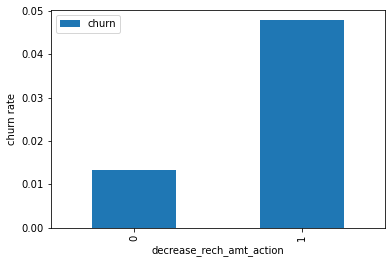

In [54]:
# Churn rate on the basis whether the customer decreased her/his amount of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is more for the customers, whose of recharge amount decreased in the action phase than the good phase.

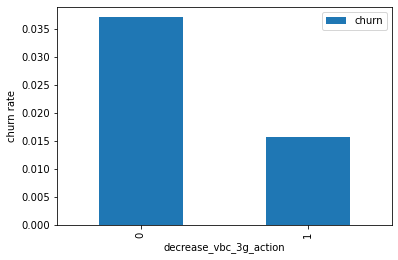

In [55]:
 # hurn rate on the basis whether the customer decreased her/his number of recharge in action month
data.pivot_table(values='churn', index='decrease_vbc_3g_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

In [56]:
# Analysis of the average revenue per customer for both churn and not churn in the action phase
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]


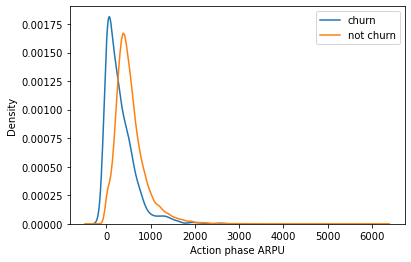

In [57]:
# Distribution plot
ax = sns.distplot(data_churn['arpu_8'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_8'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.legend()
plt.show()

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

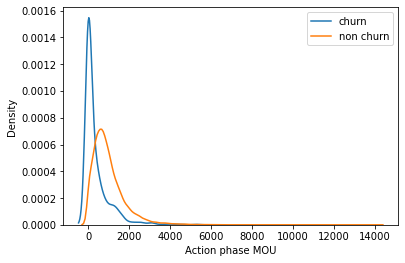

In [58]:
# Analysis of the minutes of usage MOU (churn and not churn) in the action phase
# Distribution plot
ax = sns.distplot(data_churn['mou_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['mou_action'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')
plt.legend()
plt.show()

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 1500 range. Lower the MOU, higher the churn probability during action phase

### Bivariate Analysis

Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

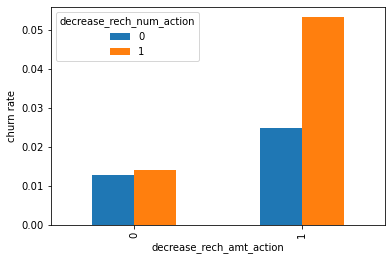

In [59]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

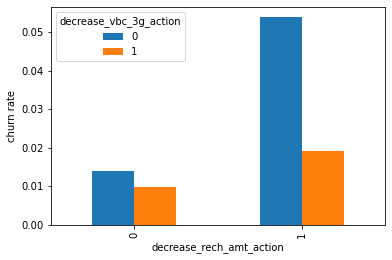

In [60]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_3g_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can observe that the churn rate is more for the customers, whose recharge amount is decreased with the increase in volume based cost in the action month.

Analysis of recharge amount and number of recharge in action month

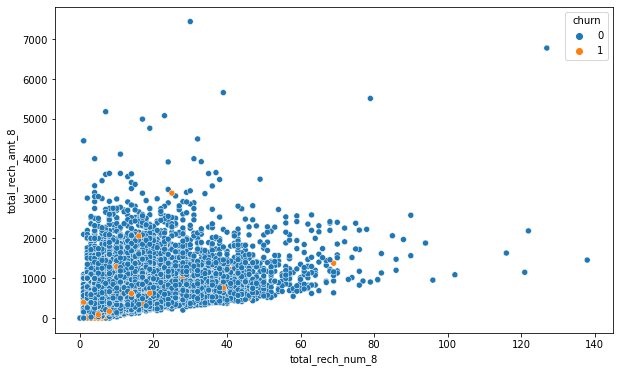

In [61]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('total_rech_num_8','total_rech_amt_8', hue='churn', data=data)

We can observe here that recharge amount and number of recharge hace almost linear relationship. The same is true for both churn and non-churn cases.

#### Dropping the new derive columns from the originak database

In [62]:
data = data.drop(['mou_good','mou_action','diff_mou','rech_num_good','diff_rech_num','rech_amt_good',
                 'diff_rech_amt','arpu_good','diff_arpu','vbc_3g_good','diff_vbc_3g'], axis=1)

### Now let us move to the Test and Train split for modelling

In [63]:
# Import library
from sklearn.model_selection import train_test_split
X = data.drop(['mobile_number','churn'], axis=1)
y = data['churn']

In [64]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with Class imbalance using SMOTE

In [65]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE
sm = SMOTE(random_state=27)


In [66]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [67]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_3g_action')


In [69]:
# transforming the data
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [70]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average,decrease_mou_action,decrease_arpu_action,decrease_vbc_3g_action,decrease_rech_num_action,decrease_rech_amt_action
0,0.0,0.0,0.0,0.138099,-0.524287,-0.277210,0.107067,-0.662133,-0.465702,-0.212150,-0.635989,0.316602,-0.254930,-0.001299,-0.235845,-0.299924,-0.376405,-0.414431,-0.263290,-0.311912,-0.251552,0.484696,-0.191237,-0.399363,-0.257169,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,0.128525,-0.336170,-0.418989,0.255586,-0.528520,-0.337598,-0.342567,-0.503801,0.649999,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.048264,-0.731099,0.214395,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.018022,-0.347135,-0.015583,-0.013735,-0.000842,-0.860270,-0.011338,-0.204497,-0.267019,-0.242904,-0.380904,-0.273133,-0.437678,-0.290227,-0.270855,-0.150113,-0.409476,-0.364422,-0.440556,-0.175817,-0.159844,0.078725,-0.165109,0.366888,-0.117347,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.235898,0.120717,-0.064064,-0.476525,-0.287711,-0.420934,-0.366938,-0.089565,-0.191817,-0.152636,-0.154479,-0.126705,-0.099701,-0.120560,-0.081522,0.191045,-0.446453,0.304052,0.041674,-0.726612,-0.236245,0.053942,0.023188,0.029579,0.601919,-0.810926,-0.627031,-0.094599,0.700387,1.751483,0.513596,1.201853,-0.241485,3.235900,3.107186,-0.232664,4.035347,2.355546,2.447099,-0.225005,-0.221607,-0.216069,-0.14124,-0.137326,-0.114084,-0.361381,-0.236073,-0.265248,0.110852,-0.426903,1,1,1,0,1
1,0.0,0.0,0.0,-1.426806,4.416224,3.251471,-0.658546,-0.237116,-0.004389,-0.775413,2.521574,2.729991,-0.254930,-0.253598,-0.304936,-0.299924,-0.376405,-0.432652,-0.201389,0.270420,0.198129,-0.529895,1.105781,0.288744,-0.276559,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.477412,0.843110,0.290263,-0.570492,-0.320415,-0.040870,-0.512457,2.293280,3.084824,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.771806,1.366671,2.063557,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.970474,1.667933,1.938185,-0.411171,0.192864,0.156404,-0.482016,0.744097,0.256463,-0.290227,-0.270855,-0.257736,-0.583618,0.569677,0.219308,-0.216145,-0.200470

In [71]:
# Transforming the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average,decrease_mou_action,decrease_arpu_action,decrease_vbc_3g_action,decrease_rech_num_action,decrease_rech_amt_action
5704,0.0,0.0,0.0,0.241426,-0.270857,1.004286,-0.725392,-0.690239,-0.476559,0.480613,0.306880,2.321843,-0.077770,-0.253598,-0.304936,0.213029,-0.376405,-0.432652,-0.278196,-0.282988,-0.106923,0.027413,0.005712,0.033944,-0.088284,-0.268141,-0.245271,0.034550,-0.268757,-0.245087,-0.161739,-0.195986,-0.055352,-0.610719,-0.570355,-0.419779,0.345721,0.369717,2.699760,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.214893,-0.152342,1.550206,-0.080736,-0.09221,-0.061548,1.046227,0.769115,0.756843,0.310975,-0.015583,-0.013735,-0.254734,-0.210329,1.353627,-0.357411,-0.095324,0.281713,0.088773,-0.113229,0.515837,-0.290227,-0.270855,-0.194305,-0.156563,-0.166880,0.468091,-0.216145,-0.200470,-0.187246,0.112473,-0.185608,-0.166229,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.079108,-0.265838,-0.233517,-0.195250,-0.205183,0.286117,-0.366938,-0.089565,-0.191817,-0.152636,0.283914,-0.126705,-0.099701,-0.12056,-0.081522,-0.157743,0.258304,1.304100,0.084981,-0.238428,0.816186,0.053942,-0.174410,0.029579,0.175702,0.368491,-0.352081,3.322563,2.186970,-0.098368,-0.263171,-0.064325,0.507365,3.235900,-0.251023,-0.232664,0.459436,2.355546,2.447099,-0.225005,-0.221607,-0.216069,1.303180,1.208915,2.526212,0.224938,0.018315,0.195420,-0.259107,-0.097181,0,0,0,0,0
64892,0.0,0.0,0.0,0.045864,-0.780568,-0.158953,-0.734179,-0.698080,-0.502143,-0.359083,-0.577343,-0.256317,0.022647,-0.253598,-0.304936,-0.120567,-0.376405,-0.432652,-0.278359,-0.302953,-0.174725,-0.300718,-0.204587,-0.296065,-0.262173,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.379480,-0.338577,-0.306903,-0.619861,-0.570355,-0.415489,-0.232172,-0.436745,-0.040625,-0.144889,-0.14045,-0.104453,0.0,0.0,0.0,-0.616567,-0.714280,-0.305692,-0.080736,-0.09221,-0.061548,-0.328949,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.776089,-0.845186,-0.422237,-0.108509,-0.347909,-0.187577,0.377466,0.198985,0.240809,-0.275563,-0.257474,-0.235189,0.172282,-0.079190,0.045787,-0.216145,-0.15204

## Modelling with PCA

In [72]:
#Import PCA and fitting train data
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [73]:
# Viewing the principal components
pca.components_

array([[-8.34476841e-20, -2.77555756e-17, -2.22044605e-16, ...,
         1.67509264e-02, -1.52858643e-02, -3.06600179e-02],
       [-1.55452960e-19,  2.77555756e-17,  2.22044605e-16, ...,
        -1.76544016e-02, -5.37967020e-03, -1.20875385e-03],
       [ 1.97684195e-19, -8.32667268e-17, -2.77555756e-16, ...,
         3.24531496e-02, -1.65280384e-02, -3.08605267e-02],
       ...,
       [-0.00000000e+00, -3.35972149e-01, -1.10783513e-01, ...,
         3.81639165e-17, -4.85722573e-17, -4.21890170e-17],
       [ 0.00000000e+00,  2.78962957e-02, -1.05915446e-01, ...,
        -1.04083409e-17, -5.72458747e-17,  3.29597460e-17],
       [ 9.99999865e-01, -1.63905883e-04,  4.48731830e-04, ...,
        -1.51585016e-17,  6.44761479e-18, -2.21583819e-18]])

In [74]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11252871 0.19704997 0.24883836 0.29238848 0.33146222 0.36913162
 0.40464903 0.43436712 0.45983071 0.48453992 0.50723658 0.52903171
 0.54939306 0.56901304 0.58715907 0.60480924 0.6206278  0.63626597
 0.65070514 0.66475622 0.67838898 0.69142611 0.70320716 0.71385481
 0.72413836 0.73407301 0.74371869 0.75324535 0.76260969 0.77114578
 0.77960946 0.78762093 0.79527549 0.80267767 0.8096922  0.81626342
 0.82277122 0.8291429  0.83547484 0.84159793 0.84755562 0.85345242
 0.85906884 0.86438324 0.86962125 0.87475154 0.87949089 0.88397554
 0.88825277 0.89237874 0.89637244 0.90016192 0.90390885 0.9075463
 0.91108783 0.91460339 0.91798187 0.92128056 0.92451413 0.92759721
 0.93055853 0.93348926 0.93636789 0.9391716  0.94194927 0.94467212
 0.94732778 0.94990513 0.95240124 0.9548251  0.95711503 0.95937503
 0.9615617  0.96360379 0.96561085 0.96756249 0.96946888 0.9713205
 0.97315431 0.9749157  0.97663815 0.97830738 0.9799174  0.98151665
 0.98306657 0.98459851 0.98611493 0.98753023 0.98876397 0.989964

Text(0, 0.5, 'Cumulative Variance')

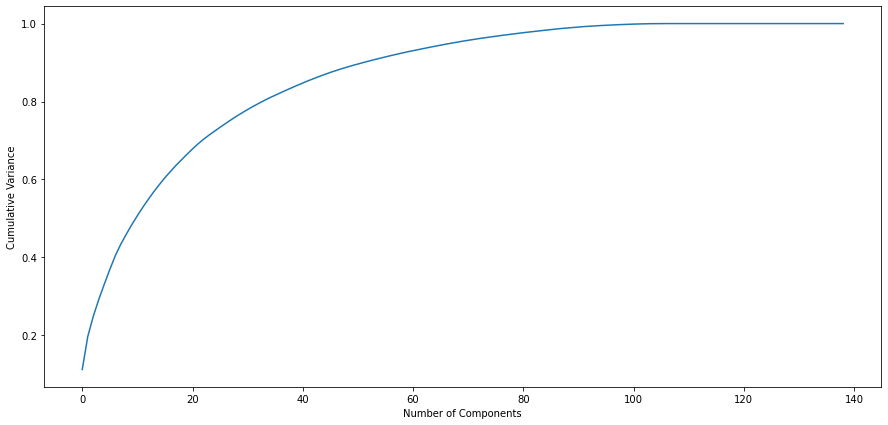

In [75]:
# Plotting the variance
fig = plt.figure(figsize = (15,7))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')


- We can see that around 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components

#### Performing PCA with 60 components

In [76]:
#Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

#fitting the train set
X_train_pca = pca_final.fit_transform(X_train)

Applying transform on the test set

In [77]:
X_test_pca = pca_final.transform(X_test)

We are more focused on higher Sensitivity/Recall score than the accuracy.

Since we are more focussed on the high value customers and retaining them is more important, we will be concentrating to increase the Recall for the model, i,e reduce the number of false negatives.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Hyperparameter tuning

In [79]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
# Creating kfold with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state=4)

We will be tuning the hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [81]:
# Specify params
params = {'C':[0.01, 0.1, 1, 10, 100, 1000]}

#Tuning
model_cv = GridSearchCV(estimator = LogisticRegression(),
                       param_grid = params,
                       scoring = 'recall',
                       cv = folds,
                       verbose = 1,
                       return_train_score = True)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [82]:
# Results of gridsearchcv
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.350197,0.027798,0.005789,0.007149,0.01,{'C': 0.01},0.894861,0.895425,0.894884,0.904562,0.884776,0.894902,0.006263,6,0.899082,0.895864,0.896818,0.894098,0.895866,0.896345,0.001626
1,0.513627,0.068665,0.008503,0.006474,0.1,{'C': 0.1},0.897940,0.896825,0.895581,0.905726,0.887783,0.896771,0.005723,1,0.900419,0.898022,0.897577,0.895090,0.897445,0.897711,0.001696
2,0.609129,0.020822,0.006465,0.005918,1,{'C': 1},0.897940,0.896125,0.895349,0.905726,0.888015,0.896631,0.005667,2,0.901349,0.899189,0.897752,0.896141,0.897971,0.898480,0.001732
3,0.588608,0.017305,0.010666,0.007516,10,{'C': 10},0.897466,0.895658,0.895814,0.905726,0.888015,0.896536,0.005643,3,0.901639,0.899014,0.897810,0.896141,0.897854,0.898492,0.001821
4,0.591863,0.052674,0.012701,0.006356,100,{'C': 100},0.897229,0.895658,0.896047,0.905959,0.887783,0.896535,0.005777,4,0.901581,0.899014,0.897752,0.896141,0.897854,0.898468,0.001805
5,0.575205,0.043002,0.008771,0.005212,1000,{'C': 1000},0.897229,0.895658,0.895814,0.905959,0.887783,0.896489,0.005782,5,0.901581,0.899014,0.897752,0.896141,0.897913,0.898480,0.001801


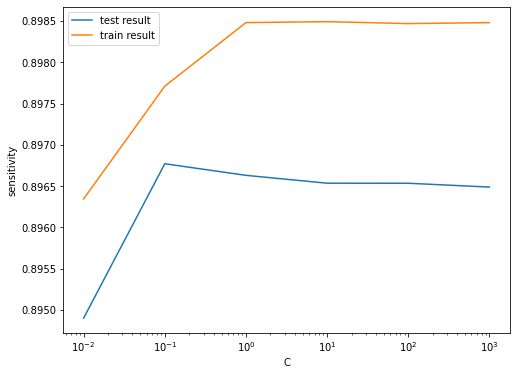

In [83]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [84]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8967712671875943 at C = 0.1


## Logistic Regression with optimal C value

In [85]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [86]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [87]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[17911  3514]
 [ 2205 19220]]


In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))


Accuracy:- 0.8665344224037339
Sensitivity:- 0.8970828471411902


#### Prediction on test set

In [90]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [91]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4429  919]
 [  37  156]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))


Accuracy:- 0.8274679660711063
Sensitivity:- 0.8082901554404145


### Model Summary

Train set
- Accuracy = 0.86
- Sensitivity = 0.89

Test set
- Accuracy = 0.83
- Sensitivity = 0.81


# Decision Tree with PCA

In [94]:
# Importing decision tree
from sklearn.tree import DecisionTreeClassifier


**Hyperparameter Tuning**

In [95]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [96]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.946288,0.021811,0.011140,0.006281,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.839907,0.820070,0.824971,0.828238,0.828471,0.828331,0.006535,6
1,2.968166,0.027509,0.016985,0.001556,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.839907,0.820070,0.824971,0.828471,0.828471,0.828378,0.006535,5
2,2.935701,0.028865,0.014074,0.002956,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.830572,0.816103,0.822404,0.822404,0.821470,0.822590,0.004629,7
3,2.956965,0.025910,0.006554,0.005822,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.830572,0.816103,0.822404,0.822404,0.821470,0.822590,0.004629,7
4,5.061390,0.038605,0.010591,0.005970,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.884247,0.902450,0.910152,0.899183,0.908285,0.900863,0.009195,2
5,5.047907,0.053555,0.012866,0.006436,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.884247,0.902450,0.910385,0.899417,0.908285,0.900957,0.009235,1
6,4.757588,0.113472,0.013726,0.004976,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.862310,0.843407,0.898250,0.876079,0.887981,0.873606,0.019285,3
7,4.836793,0.050884,0.014655,0.002039,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.862310,0.843407,0.898250,0.876079,0.887981,0.873606,0.019285,3


In [97]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9009568261376895
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [98]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

**Predictions on Train Dataset**

In [99]:
y_train_pred = dt_pca_model.predict(X_train_pca)


In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[18776  2649]
 [ 1877 19548]]


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8943757292882147
Sensitivity:- 0.912392065344224
Specificity:- 0.8763593932322054


**Predictions on Test Dataset**

In [103]:
y_test_pred = dt_pca_model.predict(X_test_pca)


In [104]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4630  718]
 [  66  127]]


In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8585092943512002
Sensitivity:- 0.6580310880829016
Specificity:- 0.8657442034405385


**Model Summary**
- Train set:-
  - Accuracy = 0.90
  - Sensitivity = 0.91
  - Specificity = 0.88
  
- Test Set
  - Accuracy = 0.86
  - Sensitivity = 0.70
  - Specificity = 0.87

# Logistic Regression without PCA 

In [107]:
# Importing statsmodel.api
import statsmodels.api as sm


In [108]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [109]:
# Fit the model
log_no_pca = log_no_pca.fit()

In [110]:
# Summary
log_no_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42719
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Dec 2022   Deviance:                   1.0712e+05
Time:                        15:18:08   Pearson chi2:                 5.24e+18
No. Iterations:                    56   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.703e+14   1.01e+06   3.65e+08      0.000     3.7e+14     3.7e+14
loc_og_t2o_mou            1.366e+08      1.429   9.56e+07      0.000    1.37e+08    1.37e+08
std_og_t2o_mou            -2.97e+07      1.053  -2.82e+07      0.000   -2.97e+07   -2.97e+07
loc_ic_t2o_mou           -1.696e+08      1.427  -1.19e+08      0.000    -1.7e+08    -1.7e+08
arpu_6                   -5.532e+13   1.21e+06  -4.58e+07      0.000   -5.53e+13   -5.53e+13
arpu_7                    5.026e+13    1.3e+06   3.87e+07      0.000    5.03e+13    5.03e+13
arpu_8                    -1.12e+14   1.63e+06  -6.85e+07      0.000   -1.12e+14   -1.12e+14
onnet_mou_6                1.55e+15   5.25e+07   2.95e+07      0.000    1.55e+15    1.55e+15
onnet_mou_7               1.735e+15   3.48e+07   4.99e+07      0.000    1.74e+15    1.74e+15
onnet_mou_8              -1.651e+14   2.09e+07  -7.92e+06      0.000   -1.65e+14   -1.65e+14
offnet_mou_6              1.562e+15   4.95e+07   3.16e+07      0.000    1.56e+15    1.56e+15
offnet_mou_7              1.962e+15   3.32e+07    5.9e+07      0.000    1.96e+15    1.96e+15
offnet_mou_8             -3.298e+14   2.13e+07  -1.55e+07      0.000    -3.3e+14    -3.3e+14
roam_ic_mou_6             2.202e+13   5.98e+05   3.68e+07      0.000     2.2e+13     2.2e+13
roam_ic_mou_7            -2.241e+13   6.81e+05  -3.29e+07      0.000   -2.24e+13   -2.24e+13
roam_ic_mou_8             3.983e+13   5.94e+05   6.71e+07      0.000    3.98e+13    3.98e+13
roam_og_mou_6            -5.112e+14   1.67e+07  -3.05e+07      0.000   -5.11e+14   -5.11e+14
roam_og_mou_7            -4.961e+14   9.06e+06  -5.48e+07      0.000   -4.96e+14   -4.96e+14
roam_og_mou_8             1.124e+14   6.01e+06   1.87e+07      0.000    1.12e+14    1.12e+14
loc_og_t2t_mou_6         -4.621e+16    1.2e+10  -3.84e+06      0.000   -4.62e+16   -4.62e+16
loc_og_t2t_mou_7         -1.409e+17   1.27e+10  -1.11e+07      0.000   -1.41e+17   -1.41e+17
loc_og_t2t_mou_8          7.142e+17   1.19e+10   5.98e+07      0.000    7.14e+17    7.14e+17
loc_og_t2m_mou_6         -4.684e+16   1.22e+10  -3.84e+06      0.000   -4.68e+16   -4.68e+16
loc_og_t2m_mou_7         -1.332e+17   1.19e+10  -1.12e+07      0.000   -1.33e+17   -1.33e+17
loc_og_t2m_mou_8           7.62e+17   1.27e+10   5.98e+07      0.000    7.62e+17    7.62e+17
loc_og_t2f_mou_6         -4.008e+15   1.04e+09  -3.84e+06      0.000   -4.01e+15   -4.01e+15
loc_og_t2f_mou_7         -1.184e+16   1.06e+09  -1.12e+07      0.000   -1.18e+16   -1.18e+16
loc_og_t2f_mou_8          6.312e+16   1.06e+09   5.97e+07      0.000    6.31e+16    6.31e+16
loc_og_t2c_mou_6          7.751e+12   4.58e+05   1.69e+07      0.000    7.75e+12    7.75e+12
loc_og_t2c_mou_7          1.433e+13    4.6e+05   3.12e+07      0.000    1.43e+13    1.43e+13
loc_og_t2c_mou

**Feature Selection Using RFE**

In [111]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [112]:

# Importing RFE
from sklearn.feature_selection import RFE

# Starting with 15 variables
rfe = RFE(logreg, n_features_to_select =15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [113]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)


Index(['arpu_8', 'onnet_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'ic_others_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'monthly_2g_8', 'monthly_3g_8',
       'average', 'decrease_arpu_action', 'decrease_vbc_3g_action'],
      dtype='object')


## Model 1

In [114]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Dec 2022   Deviance:                       4610.5
Time:                        15:19:53   Pearson chi2:                 2.43e+06
No. Iterations:                    45   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4116.9553   1.99e+05      0.021      0.984   -3.87e+05    3.95e+05
arpu_8                    -0.4789      0.097     -4.932      0.000      -0.669      -0.289
onnet_mou_8                1.6830      0.187      8.978      0.000       1.316       2.050
std_og_t2m_mou_8           1.6078      0.187      8.577      0.000       1.240       1.975
isd_og_mou_8              -1.4186      0.862     -1.645      0.100      -3.108       0.271
og_others_8            -3214.5512   3.13e+05     -0.010      0.992   -6.17e+05     6.1e+05
total_og_mou_8            -2.9840      0.273    -10.935      0.000      -3.519      -2.449
loc_ic_mou_8              -2.9873      0.229    -13.057      0.000      -3.436      -2.539
ic_others_8               -1.3494      0.473     -2.852      0.004      -2.277      -0.422
total_rech_amt_6       -3.219e+06   1.54e+08     -0.021      0.983   -3.05e+08    2.99e+08
total_rech_amt_7       -3.284e+06   1.57e+08     -0.021      0.983   -3.11e+08    3.05e+08
monthly_2g_8              -0.3314      0.072     -4.625      0.000      -0.472      -0.191
monthly_3g_8              -0.6261      0.117     -5.365      0.000      -0.855      -0.397
average                 5.285e+06   2.53e+08      0.021      0.983    -4.9e+08    5.01e+08
decrease_arpu_action       0.0514      0.132      0.389      0.698      -0.208       0.311
decrease_vbc_3g_action    -0.6456      0.151     -4.277      0.000      -0.941      -0.350
==========================================================================================
"""

In [115]:
#Drop column og_others_8 due to high p-value
X_train_rfe = X_train[rfe_cols]
X_train_rfe.drop('og_others_8', axis=1, inplace = True)
X_train_rfe.columns

Index(['arpu_8', 'onnet_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'monthly_2g_8', 'monthly_3g_8', 'average',
       'decrease_arpu_action', 'decrease_vbc_3g_action'],
      dtype='object')

## Model 2

In [116]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train_rfe)

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.3
Date:                Tue, 06 Dec 2022   Deviance:                       4616.5
Time:                        15:19:55   Pearson chi2:                 2.44e+06
No. Iterations:                    49   Pseudo R-squ. (CS):             0.7216
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4224.1655   2.01e+05      0.021      0.983    -3.9e+05    3.99e+05
arpu_8                    -0.4798      0.097     -4.939      0.000      -0.670      -0.289
onnet_mou_8                1.6920      0.187      9.024      0.000       1.325       2.059
std_og_t2m_mou_8           1.6153      0.187      8.616      0.000       1.248       1.983
isd_og_mou_8              -1.4287      0.852     -1.676      0.094      -3.099       0.242
total_og_mou_8            -2.9976      0.273    -10.985      0.000      -3.532      -2.463
loc_ic_mou_8              -2.9840      0.229    -13.045      0.000      -3.432      -2.536
ic_others_8               -1.3481      0.473     -2.848      0.004      -2.276      -0.420
total_rech_amt_6       -3.268e+06   1.56e+08     -0.021      0.983   -3.08e+08    3.02e+08
total_rech_amt_7       -3.334e+06   1.59e+08     -0.021      0.983   -3.14e+08    3.08e+08
monthly_2g_8              -0.3302      0.072     -4.608      0.000      -0.471      -0.190
monthly_3g_8              -0.6244      0.117     -5.352      0.000      -0.853      -0.396
average                 5.366e+06   2.55e+08      0.021      0.983   -4.95e+08    5.06e+08
decrease_arpu_action       0.0502      0.132      0.379      0.705      -0.209       0.310
decrease_vbc_3g_action    -0.6491      0.151     -4.301      0.000      -0.945      -0.353
==========================================================================================
"""

## Model 3

In [117]:
# Dropping average column due to high p-value
X_train_rfe.drop('average', axis=1, inplace = True)

# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train_rfe)

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15164.
Date:                Tue, 06 Dec 2022   Deviance:                       30328.
Time:                        15:19:55   Pearson chi2:                 2.20e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4926
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3729      0.040     -9.229      0.000      -0.452      -0.294
arpu_8                    -0.8852      0.039    -22.747      0.000      -0.961      -0.809
onnet_mou_8                3.1685      0.092     34.361      0.000       2.988       3.349
std_og_t2m_mou_8           3.0503      0.087     34.881      0.000       2.879       3.222
isd_og_mou_8              -1.2930      0.202     -6.405      0.000      -1.689      -0.897
total_og_mou_8            -5.2601      0.141    -37.233      0.000      -5.537      -4.983
loc_ic_mou_8              -2.0874      0.062    -33.932      0.000      -2.208      -1.967
ic_others_8               -1.4008      0.125    -11.212      0.000      -1.646      -1.156
total_rech_amt_6           0.4239      0.019     21.980      0.000       0.386       0.462
total_rech_amt_7           0.6438      0.023     27.857      0.000       0.599       0.689
monthly_2g_8              -0.8520      0.042    -20.369      0.000      -0.934      -0.770
monthly_3g_8              -0.9338      0.044    -21.066      0.000      -1.021      -0.847
decrease_arpu_action      -0.8659      0.044    -19.836      0.000      -0.951      -0.780
decrease_vbc_3g_action    -1.7080      0.063    -27.039      0.000      -1.832      -1.584
==========================================================================================
"""

We can observe that the p-values of all the features are almost 0. Hence we can check the VIFs for the features.

**Checking VIF**

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,total_og_mou_8,13.94
1,onnet_mou_8,6.24
2,std_og_t2m_mou_8,5.76
0,arpu_8,3.44
8,total_rech_amt_7,1.61
5,loc_ic_mou_8,1.53
11,decrease_arpu_action,1.29
10,monthly_3g_8,1.24
12,decrease_vbc_3g_action,1.19
7,total_rech_amt_6,1.17


## Model 4

In [120]:
# Dropping onnet_mou_8 as it has high VIF value
X_train_rfe.drop('onnet_mou_8', axis=1, inplace = True)

# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train_rfe)

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16019.
Date:                Tue, 06 Dec 2022   Deviance:                       32038.
Time:                        15:19:56   Pearson chi2:                 7.76e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4720
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3964      0.040     -9.965      0.000      -0.474      -0.318
arpu_8                    -0.7094      0.036    -19.868      0.000      -0.779      -0.639
std_og_t2m_mou_8           0.1583      0.019      8.182      0.000       0.120       0.196
isd_og_mou_8              -1.6574      0.219     -7.557      0.000      -2.087      -1.228
total_og_mou_8            -0.6114      0.028    -21.936      0.000      -0.666      -0.557
loc_ic_mou_8              -3.5225      0.055    -64.543      0.000      -3.630      -3.416
ic_others_8               -1.5211      0.125    -12.167      0.000      -1.766      -1.276
total_rech_amt_6           0.4670      0.019     24.800      0.000       0.430       0.504
total_rech_amt_7           0.6389      0.022     28.715      0.000       0.595       0.682
monthly_2g_8              -0.8653      0.041    -21.282      0.000      -0.945      -0.786
monthly_3g_8              -1.0006      0.044    -22.856      0.000      -1.086      -0.915
decrease_arpu_action      -0.8910      0.042    -21.222      0.000      -0.973      -0.809
decrease_vbc_3g_action    -1.7552      0.062    -28.447      0.000      -1.876      -1.634
==========================================================================================
"""

In [121]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.43
3,total_og_mou_8,3.19
1,std_og_t2m_mou_8,1.93
7,total_rech_amt_7,1.60
10,decrease_arpu_action,1.29
9,monthly_3g_8,1.24
4,loc_ic_mou_8,1.23
11,decrease_vbc_3g_action,1.19
6,total_rech_amt_6,1.17
8,monthly_2g_8,1.08


Now we can see that all features have less VIF as well as low p-value as well. Hence we can consider Model 4 as the final model for Logistic regression without PCA.

## Model performance on train set

In [122]:
# Getting the predicted value on the train set
y_train_pred_nopca = log_no_pca_1.predict(X_train_sm_1)
y_train_pred_nopca.head()

0    2.718017e-01
1    1.748561e-01
2    1.663166e-01
3    1.445169e-02
4    2.925259e-19
dtype: float64

In [123]:
# Creating dataframe with actual churn and predicted churn probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob': y_train_pred_nopca.values})

#Adding Customer ID for easy recognition
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.718017e-01,0
1,0,1.748561e-01,1
2,0,1.663166e-01,2
3,0,1.445169e-02,3
4,0,2.925259e-19,4


#### Finding optimal Cutoff point

In [124]:
 # Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.718017e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,1.748561e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,1.663166e-01,2,1,1,0,0,0,0,0,0,0,0
3,0,1.445169e-02,3,1,0,0,0,0,0,0,0,0,0
4,0,2.925259e-19,4,1,0,0,0,0,0,0,0,0,0


In [125]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.745601     0.982730     0.508471
0.2          0.2  0.783314     0.968075     0.598553
0.3          0.3  0.808495     0.947631     0.669358
0.4          0.4  0.823921     0.919207     0.728635
0.5          0.5  0.833536     0.882567     0.784504
0.6          0.6  0.833862     0.823431     0.844294
0.7          0.7  0.819767     0.737223     0.902310
0.8          0.8  0.786184     0.621517     0.950852
0.9          0.9  0.614352     0.244481     0.984224


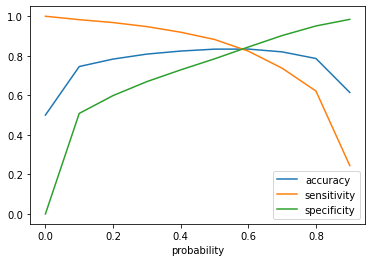

In [126]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

We can observe here that at 0.6 all three parameters are stable.

But in out case, we want to have better sensitivity than accuracy and specificity. Hence, even though 0.6 would be the optimal cutiff, we will be taking 0.5 as the cutoff in order to have higher sensitivity.

In [127]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.718017e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,1.748561e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,1.663166e-01,2,1,1,0,0,0,0,0,0,0,0,0
3,0,1.445169e-02,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.925259e-19,4,1,0,0,0,0,0,0,0,0,0,0


In [128]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16808  4617]
 [ 2516 18909]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Accuracy:- 0.8335355892648775
Sensitivity:- 0.8825670945157527


We have 88% sensitivity which is really good.

In [131]:
# Plotting ROC CUrve
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

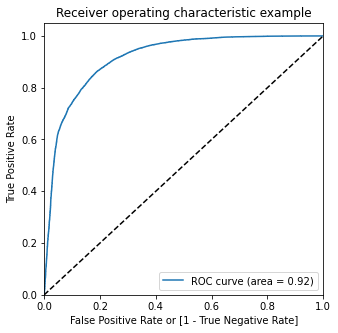

In [132]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

### Testing the model on test set

In [133]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [134]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[X_train_rfe.columns]

In [135]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [136]:
# Predict on the test set
y_test_pred = log_no_pca_1.predict(X_test_sm)
y_test_pred.head()

5704     0.067407
64892    0.001573
39613    0.204702
93118    0.054949
81235    0.014024
dtype: float64

In [137]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.067407
64892,0.001573
39613,0.204702
93118,0.054949
81235,0.014024


In [138]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [139]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()


,churn,CustID,0
0,0,5704,0.067407
1,0,64892,0.001573
2,0,39613,0.204702
3,0,93118,0.054949
4,0,81235,0.014024


In [141]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.067407
1,64892,0,0.001573
2,39613,0,0.204702
3,93118,0,0.054949
4,81235,0,0.014024


In [142]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.067407,0
1,64892,0,0.001573,0
2,39613,0,0.204702,0
3,93118,0,0.054949,0
4,81235,0,0.014024,0


Checking the evaluation metrics for test data

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4146 1202]
 [  38  155]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Accuracy:- 0.776213679841184
Sensitivity:- 0.8031088082901554


### Model Summary

Train set
- Accuracy = 0.83
- Sensitivity = 0.88

Test set
- Accuracy = 0.77
- Sensitivity = 0.80

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Conclusion

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can consider the logistic regression without PCA model as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

Let's check what are the top features that define the model

In [146]:
rfe = RFE(logreg,n_features_to_select=5)

rfe = rfe.fit(X_train_rfe,y_train)

col= X_train_rfe.columns[rfe.support_]

X_train_rfe_final = X_train_rfe[col]

X_train_rfe_final.columns

Index(['isd_og_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'monthly_3g_8',
       'decrease_vbc_3g_action'],
      dtype='object')

### Final Conclusion and recommendations

We can observe above that the top 5 features that affect the churn of a customer are the following:
- isd_og_mou_8
- loc_ic_mou_8
- ic_others_8
- monthly_3g_8
- decrease_vbc_3g_action

Hence, we could make the following recommendations:
- The team could concentrate on users who have low minutes of usage for outgoing ISD calls in August as compared to previous months as they are more likely to churn.
- Customers who have lower usage for local incoming calls in August have more probability of churn.
- Overall lower incoming calls in the month of August could be an indicator of a possible customer churn.
- Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
- Cutomers, whose monthly 3G and 2G recharge in August is less, are likely to be churned.